In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
np.random.seed(123)
from scipy import linalg

In [2]:
x1 = np.linspace(0,1,10)
x2 = np.exp(x1)
print(x1)
print(x2)

[ 0.          0.11111111  0.22222222  0.33333333  0.44444444  0.55555556
  0.66666667  0.77777778  0.88888889  1.        ]
[ 1.          1.11751907  1.24884887  1.39561243  1.5596235   1.742909
  1.94773404  2.17662993  2.43242545  2.71828183]


In [3]:
np.random.randn(len(x1))

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025,
        1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ])

In [4]:
mu = 0.0
sigma = 0.5
noise =  sigma**2 * np.random.randn(len(x1)) + mu
noise

array([-0.16972154, -0.02367724,  0.37284741, -0.1597255 , -0.11099549,
       -0.10858782,  0.55148252,  0.54669652,  0.25101347,  0.0965466 ])

In [5]:
a2 = 3.5
a1 = 2.3
a0 = 1.5
y = a0 + a1 * x1 + a2 * x2 + noise

In [6]:
np.column_stack((x1, x2, y))

array([[  0.        ,   1.        ,   4.83027846],
       [  0.11111111,   1.11751907,   5.64319505],
       [  0.22222222,   1.24884887,   6.75492956],
       [  0.33333333,   1.39561243,   6.99158466],
       [  0.44444444,   1.5596235 ,   7.86990897],
       [  0.55555556,   1.742909  ,   8.76937145],
       [  0.66666667,   1.94773404,  10.401885  ],
       [  0.77777778,   2.17662993,  11.45379017],
       [  0.88888889,   2.43242545,  12.30894701],
       [  1.        ,   2.71828183,  13.410533  ]])

In [7]:
X = np.column_stack((x1, x2))
print(X)

[[ 0.          1.        ]
 [ 0.11111111  1.11751907]
 [ 0.22222222  1.24884887]
 [ 0.33333333  1.39561243]
 [ 0.44444444  1.5596235 ]
 [ 0.55555556  1.742909  ]
 [ 0.66666667  1.94773404]
 [ 0.77777778  2.17662993]
 [ 0.88888889  2.43242545]
 [ 1.          2.71828183]]


In [8]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
ypred = model.predict(X)

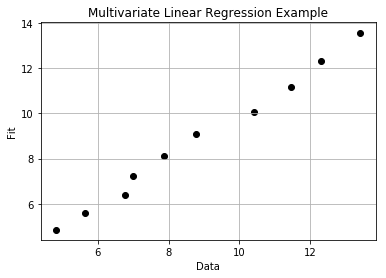

In [10]:
plt.scatter(y, ypred, color='k', marker='o')
plt.xlabel('Data')
plt.ylabel('Fit')
plt.title('Multivariate Linear Regression Example')
plt.grid(True)
plt.show()

In [11]:
print(model.intercept_)
print(model.coef_)

1.89192151585
[ 3.59673183  2.97190225]


In [12]:
model.score(X, y) # R^2 value from scikit-learn

0.99275259385870251

In [13]:
detchk = linalg.det(X.T @ X)
print(detchk)

8.170265322381736


In [14]:
# Compare with analytical solution
X = np.ones((len(x1),3))
X[:,1] = x1
X[:,2] = x2
theta = linalg.inv(X.T @ X) @ X.T @ y
print(theta)

[ 1.89192152  3.59673183  2.97190225]


In [15]:
ypred = X @ theta

In [16]:
np.column_stack((y, ypred))

array([[  4.83027846,   4.86382376],
       [  5.64319505,   5.61271582],
       [  6.75492956,   6.40265202],
       [  6.99158466,   7.23845583],
       [  7.86990897,   8.12551758],
       [  8.76937145,   9.06986104],
       [ 10.401885  ,  10.07821791],
       [ 11.45379017,  11.158111  ],
       [ 12.30894701,  12.31794715],
       [ 13.410533  ,  13.56712123]])

In [17]:
ybar = np.mean(y)
SStot = np.sum((y - ybar)**2) # Total Sum of Squares
SSres = np.sum((y - ypred)**2) # Residual Sum of Squares
Rsq = 1.0 - SSres / SStot
print(Rsq)

0.992752593859
